# Anemia Classification with EDA
. gender: 0-male, 1-female<br/>
. Hemoglobin: Hemoglobin adalah protein dalam sel darah merah Anda yang membawa oksigen ke organ dan jaringan tubuh Anda serta mengangkut karbon dioksida dari organ dan jaringan kembali ke paru-paru Anda.<br/>
. MCH: MCH adalah singkatan dari "mean corpuscular hemoglobin." Ini adalah jumlah rata-rata protein yang disebut hemoglobin dalam setiap sel darah merah Anda, yang membawa oksigen ke seluruh tubuh Anda.<br/>
. MCHC: MCHC adalah singkatan dari mean corpuscular hemoglobin concentration. Ini adalah ukuran konsentrasi rata-rata hemoglobin di dalam satu sel darah merah.<br/>
. MCV: MCV adalah singkatan dari mean corpuscular volume. Tes darah MCV mengukur ukuran rata-rata sel darah merah Anda.<br/>
. Hasil: 0- tidak anemia, 1-anemia

### 1. Exploratory Data Analysis(EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import preprocessing
import os

In [2]:
df=pd.read_csv('anemia.csv')
print(df.head(),'\n')
df.info()
df.isnull().sum()

   Gender  Hemoglobin   MCH  MCHC   MCV  Result
0       1        14.9  22.7  29.1  83.7       0
1       0        15.9  25.4  28.3  72.0       0
2       0         9.0  21.5  29.6  71.2       1
3       0        14.9  16.0  31.4  87.5       0
4       1        14.7  22.0  28.2  99.5       0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [3]:
df.duplicated().sum()

np.int64(887)

In [4]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

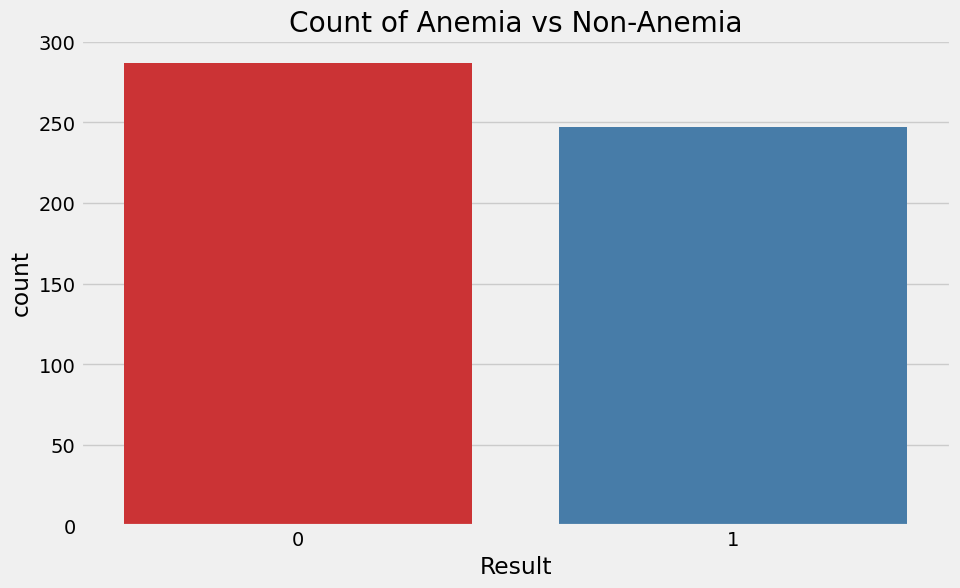

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x='Result',data=df,palette='Set1')
plt.title('Count of Anemia vs Non-Anemia')
plt.show()

<Axes: xlabel='Gender'>

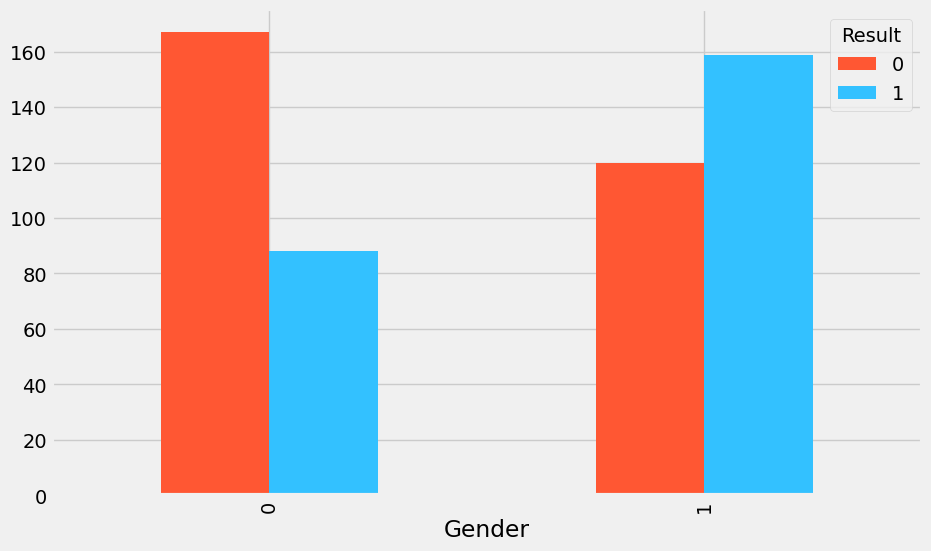

In [6]:
df.groupby(['Gender','Result'])['Result'].count().unstack().plot(kind='bar',figsize=(10,6),color=['#FF5733','#33C1FF'])

### 2. Feature Engineering and Data Cleaning

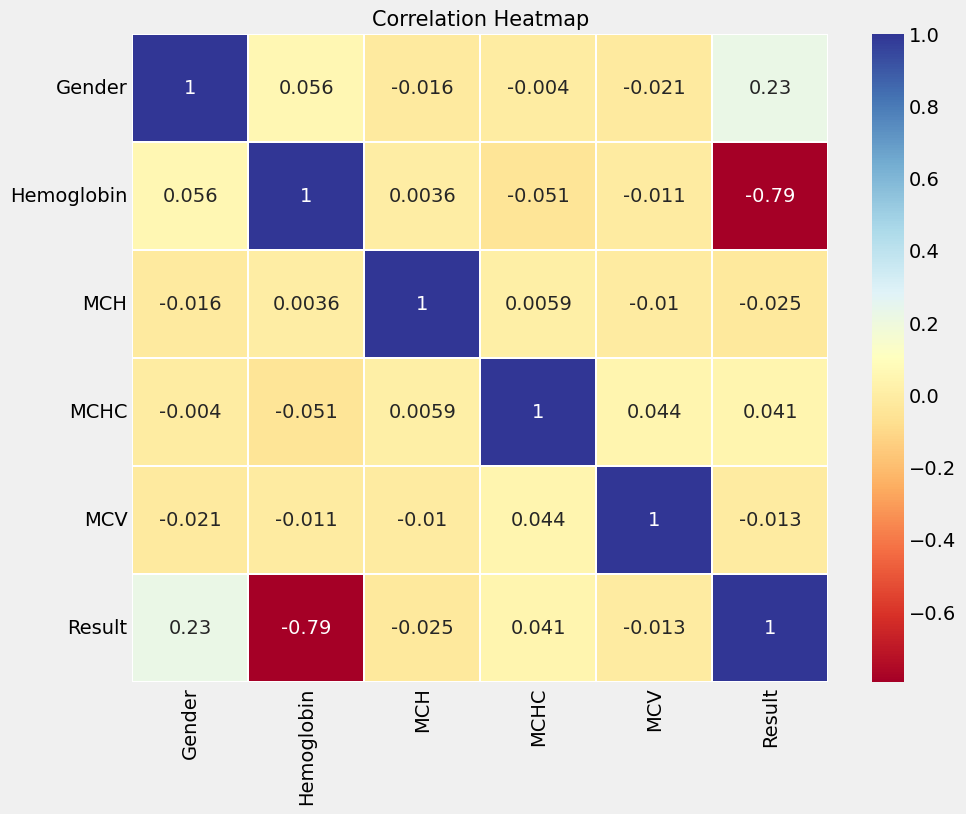

In [7]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu',linewidths=0.2)
plt.gcf().set_size_inches(10,8)
plt.title('Correlation Heatmap',size=15)
plt.show()

### 3. Predictive Modelling

In [8]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
X=df[df.columns[:-1]]
y=df['Result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(427, 107, 427, 107)

In [10]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
print(f'Accuracy for Linear SVM: {accuracy}')

Accuracy for Linear SVM: 0.9813084112149533


Cross Validation Mean Scores: 0.9906359189378058
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       287
           1       0.98      1.00      0.99       247

    accuracy                           0.99       534
   macro avg       0.99      0.99      0.99       534
weighted avg       0.99      0.99      0.99       534



<Axes: >

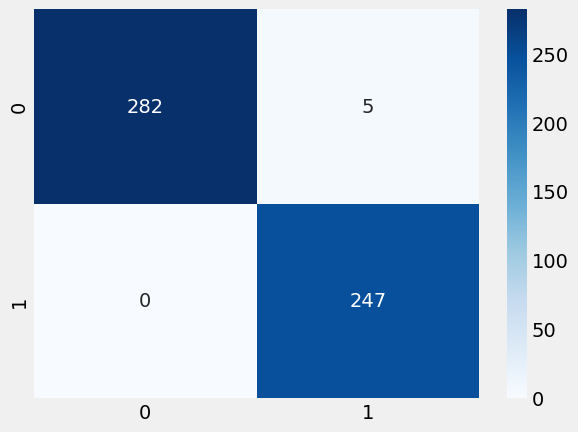

In [11]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import classification_report

y_pred=cross_val_predict(model,X,y,cv=10)
cv_scores=cross_val_score(model,X,y,cv=10)
print(f'Cross Validation Mean Scores: {cv_scores.mean()}')

# clasification report
print(classification_report(y,y_pred))

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='d',cmap='Blues')

In [12]:
import pickle

pipeline_filename='anemia_model.pkl'
with open(pipeline_filename,'wb') as file:
  pickle.dump(model,file)
print(f'Model saved to {pipeline_filename}')

Model saved to anemia_model.pkl
